# User's Guide, Chapter 23: Roman Numeral Analysis

F major is a chord that has the notes F, A, and usually C.  Those notes, placed in the same octave, instrument, dynamics, etc., should have basically the same acoustical properties each time it's played, but human perception of this chord can seem to vary dramatically depending on the context the chord is placed in.  One of the most powerful contexts that can give the same isolated sound remarkably different meanings comes from its surrounding key.

Roman numeral analysis is a way to identify certain similarities in tonal music (whether classical, folk, or popular) that have traditionally been assigned to different chords that appear on the same scale degrees in different keys.

Let's create an F-major chord but convert it to roman numerals in a few different contexts by creating different key objects.  First the setup:

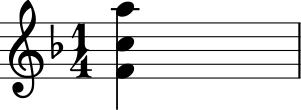

In [9]:
f = chord.Chord('F4 C5 A5')
kf = key.Key('F')
sf = stream.Measure([kf, f])
sf.show()

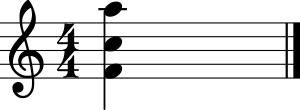

In [3]:
kc = key.Key('C')
sc = stream.Part([kc, f])
sc.show()

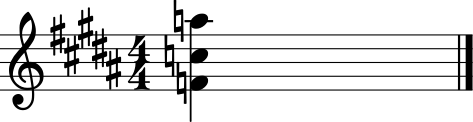

In [5]:
kb = key.Key('B') 
sb = stream.Part([kb, f])
sb.show()

Now that we have four different keys, let's create Roman numerals from the F major chord and each of the keys.  We will use a function from the :ref:`moduleRoman` module called :func:`~music21.roman.romanNumeralFromChord` (which we saw briefly in :ref:`Chapter 10 <users_guide_10_examples1>`).  We pass to this function a `Chord` object and a `Key` object.

In [21]:
rf = roman.romanNumeralFromChord(f, kf)
rf

<music21.roman.RomanNumeral I in F major>

In [12]:
rc = roman.romanNumeralFromChord(f, kc)
rc

<music21.roman.RomanNumeral IV in C major>

`Music21` tries its best to find a Roman numeral for almost any combination of chord and key, even if, like in B major:

In [13]:
rb = roman.romanNumeralFromChord(f, kb)
rb

<music21.roman.RomanNumeral bV in B major>

Each :class:`~music21.roman.RomanNumeral` object has some common properties, such as `.figure`, `.key`, and `.scaleDegree`:

In [14]:
(rf.figure, rc.figure, rb.figure)

('I', 'IV', 'bV')

In [16]:
(rf.key, rc.key, rb.key)

(<music21.key.Key of F major>,
 <music21.key.Key of C major>,
 <music21.key.Key of B major>)

In [17]:
(rf.scaleDegree, rc.scaleDegree, rb.scaleDegree)

(1, 4, 5)

Note that in the last case, the scale degree is the uninflicted degree -- the flat sign isn't included in the `.scaleDegree` tag.  For that, use `.scaleDegreeWithAlteration`

In [18]:
rf.scaleDegreeWithAlteration

(1, None)

In [19]:
rb.scaleDegreeWithAlteration

(5, <accidental flat>)

`RomanNumeral` objects are `Music21Objects` so they can be put into Streams and showed:

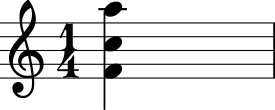

In [23]:
s = stream.Measure()
s.insert(0, rf)
s.show()

Note that the spacing of the roman numeral is preserved from the chord that it was converted from.  If we create a `RomanNumeral` object directly, then it is created in closed position above a tonic note in octave 4:

In [27]:
rf2 = roman.RomanNumeral('I', kf)
rf2

<music21.roman.RomanNumeral I in F major>

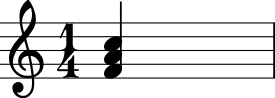

In [26]:
rf2.show()

It is possible to pass in just a roman numeral ("I", "ii", "iii", "IV", etc.) and a string ("C" = C major, "c" = c minor) to create a RomanNumeral object:

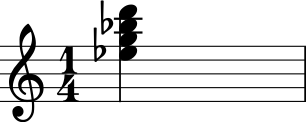

In [28]:
roman.RomanNumeral("IV7", "B-").show()

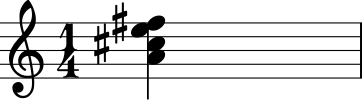

In [31]:
roman.RomanNumeral("ii65", "E").show()

Many of these properties can be changed:

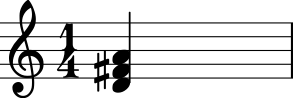

In [20]:
rf.key = key.Key('D')
rf.show()

Changing the key removes any information about pitch spacing.  You can't have everything.  :-)

In [32]:
rf.key = key.Key('F')  # restore it...


In [37]:
rf.inversion(0)

In [35]:
rf

<music21.roman.RomanNumeral I in F major>

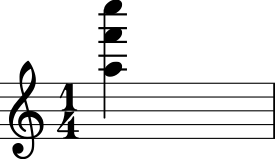

In [36]:
rf.show()

In [15]:
(rf.quality, rc.quality, rb.quality)

('major', 'major', 'major')